# Minibatchkmeans

É um algorítmo do sklearn para clusterização, uma variante do Kmeans, que usa minibatches para reduzir o tempo de computação, sendo estes subconjuntos dos dados de entrada que são amostrados de maneira aleatória a cada iteração do treinamento, convergindo em menos passos para a solução. Ele funciona entre dois passos principais: São sorteadas X amostras entre os conjuntos de dados para formar um minibatch e estes são atribuídos ao centróide mais próximo e; O centróide é atualizado.Essas duas etapas se repetem até que ocorra a convergência ou alcance um número Y de iterações.

Ele possui a seguinte estrutura de parâmetros possíveis : 


class sklearn.cluster.MiniBatchKMeans(n_clusters=8, init=’k-means++’, max_iter=100, batch_size=100, verbose=0, compute_labels=True, random_state=None, tol=0.0, max_no_improvement=10, init_size=None, n_init=3, reassignment_ratio=0.01)

Assim, você pode controlar o número de centróides a serem gerados com o n_clusters, pode controlar o número de iterações para não aguardar a convergência através do max_iter.

Com o init é possível controlar os centros iniciais dos clusters, sendo  o ‘k-means++ responsável por escolher um centro que forneça um caminho rápido para a convergência, mas há ainda o random que rescolhe k observações de maneira randomica nos dados para serem os centróides iniciais. É possível ainda controlar o número de batches através do atributo batch_size. 
















## Importando as bibliotecas

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn import metrics
from sklearn.metrics import pairwise_distances
%matplotlib inline

## Leitura do dataset 

O dataset utilizado foi o produzido pela equipe a fim de reduzir o tamanho do arquivo, por tanto, considera apenas a câmera de segurança.

In [130]:
dataset_security_camera = pd.read_csv('../dataset/camera.csv')

## Visualização Rápida

Percebe-se nesse dataset a inclusão de duas colunas, correspondentes à classificação dos botnets gafgyt e mirai

In [131]:
dataset_security_camera.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,label
0,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,0
1,1.000000,590.000000,0.000000e+00,1.000000,590.000000,0.000000,1.000000,590.000000,0.000000,1.000000,...,0.0,0.0,4.456899,443.197258,121.885335,443.197258,14856.034960,0.0,0.0,0
2,1.956973,590.000000,5.820766e-11,1.973957,590.000000,0.000000,1.991242,590.000000,0.000000,1.999121,...,0.0,0.0,5.456507,470.101420,123.932152,470.101420,15359.178351,0.0,0.0,0
3,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,0
4,1.988608,66.034372,3.599882e+01,1.993149,66.020623,35.999575,1.997711,66.006874,35.999953,1.999771,...,0.0,0.0,1.000000,72.000000,0.000000,72.000000,0.000000,0.0,0.0,0


In [132]:
dataset_security_camera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141555 entries, 0 to 141554
Columns: 116 entries, MI_dir_L5_weight to label
dtypes: float64(115), int64(1)
memory usage: 125.3 MB


## Aplicando o Minibatch kmeans

In [177]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters = 3, init='k-means++', max_iter=300, n_init=10, random_state=0, batch_size = 500)
X = dataset_security_camera.drop('label',1)

minibatch_kmeans.fit(X)

minibatch_kmeans.cluster_centers_

array([[ 3.35636237e+01,  1.14022617e+02,  1.30534340e+04,
         5.05653513e+01,  1.14013431e+02,  1.36290191e+04,
         1.32371490e+02,  1.15095981e+02,  1.49136450e+04,
         7.52309431e+02,  1.18793255e+02,  1.73186801e+04,
         1.42243615e+03,  1.21242923e+02,  1.88285225e+04,
         3.35636237e+01,  1.14022617e+02,  1.30534340e+04,
         5.05653513e+01,  1.14013431e+02,  1.36290191e+04,
         1.32371490e+02,  1.15095981e+02,  1.49136450e+04,
         7.52309431e+02,  1.18793255e+02,  1.73186801e+04,
         1.42243615e+03,  1.21242923e+02,  1.88285225e+04,
         2.12143249e+01,  1.13867947e+02,  3.68629080e+01,
         1.72759268e+02,  3.79603720e+04, -2.22212937e+03,
        -5.63657102e-03,  3.19672212e+01,  1.13725006e+02,
         3.71195235e+01,  1.74627500e+02,  3.89429564e+04,
        -2.57371843e+03, -1.01827197e-02,  8.27665796e+01,
         1.14192542e+02,  3.97412399e+01,  1.75389367e+02,
         3.93397089e+04, -2.89557818e+03, -1.63140825e-0

In [210]:
labels = minibatch_kmeans.labels_

labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [179]:
minibatch_kmeans.score(X)

-5.836516713801532e+37

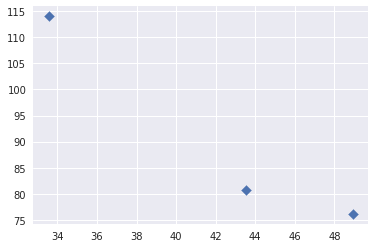

In [180]:
centroids = minibatch_kmeans.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

plt.scatter(centroids_x, centroids_y, marker= 'D',s=50)

# Métricas

## Atributo Inertia

É um atributo computado que mede a distância de cada registro do centróide do cluster ao qual ele pertence. Assim, quando menor for esse valor, melhor.

In [181]:
minibatch_kmeans.inertia_

5.836516713801533e+37

## Calinski-Harabaz Score

Se os rótulos de verdade do solo não forem conhecidos, o índice de Calinski-Harabaz pode ser usado para avaliar o modelo, onde um maior escore de Calinski-Harabaz se relaciona a um modelo com clusters melhor definidos.

Para kclusters, o escore Calinski-Harabaz sé dado como a razão entre a média da dispersão entre os clusters e a dispersão dentro do cluster:

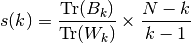

In [211]:
metrics.calinski_harabaz_score(X, labels)

2256174.5550905084

## Testando variações de n_init

n_init é o atributo responsável por setar o número de inicializações aleatórias que são tentadas. Em contraste com o KMeans, o algoritmo é executado apenas uma vez, usando a melhor das n_initinicializações medida pela inércia.


In [215]:
inertias = []
habaz = []

for i in range(1,100):
    minibatch_kmeans = MiniBatchKMeans(n_clusters = 3, init='k-means++', max_iter=300, n_init=i, random_state=0, batch_size = 500)
    minibatch_kmeans.fit(X)
    
    inertias.append(minibatch_kmeans.inertia_)
    
    labels = minibatch_kmeans.labels_

    habaz.append(metrics.calinski_harabaz_score(X, labels)) 
    
print("\nO mínimo é:", min(inertias), " N_init: ", inertias.index(min(inertias)) + 1)    
print("\nO máximo de calinski_harabaz é:", max(habaz), " N_init: ", habaz.index(max(habaz)) + 1)


O mínimo é: 5.830733910167941e+37  N_init:  61

O máximo de calinski_harabaz é: 2257701.287051781  N_init:  18


### Impacto na clusterização

#### Inertia

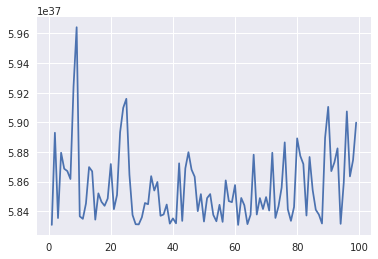

In [193]:
plt.plot(range(1,100), inertias)
plt.show()

#### Habaz

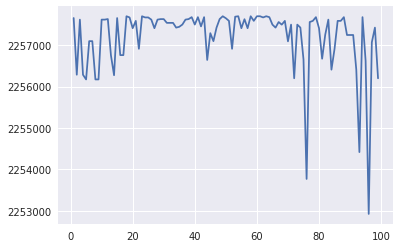

In [218]:
plt.plot(range(1,100), habaz)
plt.show()